<a href="https://colab.research.google.com/github/GabeMaldonado/AIforMedicine/blob/master/AIforMed_W3_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Visualizing MRI Images

We are going to use the 3d MRI brain scan images from the [Medical Segmentation Decathalon](https://decathlon-10.grand-challenge.org/) challenge project. This dataset contains labeled data associated with each point (voxel) inside a 3D representation of a patient's brain. 

In [1]:
!pip install itk

     |████████████████████████████████| 11.0MB 3.6MB/s 
     |████████████████████████████████| 32.7MB 130kB/s 
     |████████████████████████████████| 8.9MB 47.0MB/s 
     |████████████████████████████████| 40.5MB 111kB/s 
     |████████████████████████████████| 59.3MB 1.3MB/s 
     |████████████████████████████████| 12.3MB 19.1MB/s 


In [2]:
!pip install itkwidgets

     |████████████████████████████████| 3.3MB 2.8MB/s 
     |████████████████████████████████| 3.5MB 34.6MB/s 
     |████████████████████████████████| 256kB 44.2MB/s 
     |████████████████████████████████| 460kB 47.5MB/s 
     |████████████████████████████████| 552kB 48.2MB/s 
     |████████████████████████████████| 1.6MB 38.1MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 


In [3]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')


pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


## Load Images

The following cell loads a single #3D MRI brain scan. 

In [4]:
# Define image path 

image_path=('/content/BRATS_001.nii.gz')

image_obj = nib.load(image_path)

print(f"Type of the image: {type(image_obj)}")


Type of the image: <class 'nibabel.nifti1.Nifti1Image'>


## Extract data as a np array

Run the ```get_fdata()``` method of the image object to get data as np array.

In [5]:
# Extract data

image_data = image_obj.get_fdata()

type(image_data)

numpy.ndarray

In [6]:
# Get and display image shape

height, width, depth, channels = image_data.shape

print("The image object has the following dimensions:")
print(f"height: {height}, width: {width}, depth: {depth}, channels: {channels}")

The image object has the following dimensions:
height: 240, width: 240, depth: 155, channels: 4


We can see that the image object is actually 4-dimensional. 

## Visualize Data

The depth listed above indicates that there are 155 layers (slices through the brain) in every image object. When visualizing a single layer, keep in mind that the initial layers and the end layers (0-154) don't contain much infomation and are in fact dark images. 
The cell below randomly selects a layer to be displayed. The channels can be changed to look at other regions of the image. 
Run cell multiple times to get different images.

Plotting layer 34 Channel 1 of the Image


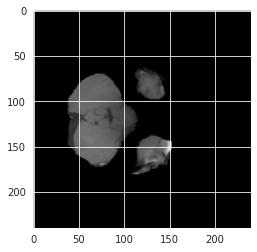

In [10]:
# Select random layer
maxval = 90
i = np.random.randint(0, maxval)

# Define channel to visualize
channel = 1

print(f"Plotting layer {i} Channel {channel} of the Image")
plt.imshow(image_data[:, :, i, channel], cmap='gray') 

## Interactive Exploration

We can use IPhython Widgets to interactively explore these data. 


In [14]:
# Define a function to explore data

def explore_images(layer):
  plt.figure(figsize=(16, 8))
  channel = 2

  plt.imshow(image_data[:, :, layer, channel], cmap='gray');
  plt.title("Exploring Layers of the Brain MRI", fontsize=22)
  plt.axis("off")
  return layer

# Run our function with ipywidgets interact() function to explore data

interact(explore_images, layer=(0, image_data.shape[2] -1));



interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

## Exploring the Data Labels

Now, let's load the labels for the 3D MRI Brain scan loaded above.


In [22]:
# Define path for labels
label_path = ('/content/Labels_BRATS_001.nii.gz')
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

## Extract Data as np array

Just as done with the sacan, use the the ```get_fdata()``` method to extract the data.

In [23]:
label_array = label_obj.get_fdata()
type(label_array)


numpy.ndarray

In [25]:
# Get the shape of the labels data

height, width, depth = label_array.shape

print(f"Dimensions of data label_array-- height:{height}, width:{width}, depth:{depth}")
print(f"With the unique values: {np.unique(label_array)}")
print(f"""Corresponding to the following data categories:
0: for normal
1: for edema
2: for non-enhancing tumor
3: for enhancing tumor
""")

Dimensions of data label_array-- height:240, width:240, depth:155
With the unique values: [0. 1. 2. 3.]
Corresponding to the following data categories:
0: for normal
1: for edema
2: for non-enhancing tumor
3: for enhancing tumor



## Visualize Labels for an Specific Layer

The cell below visualizes a single layer of the label data. We can change the value of *i* between 0-154 as we please to visdualize different layers. Remember that layers close to 0 and 154 are mostly dark iamges.

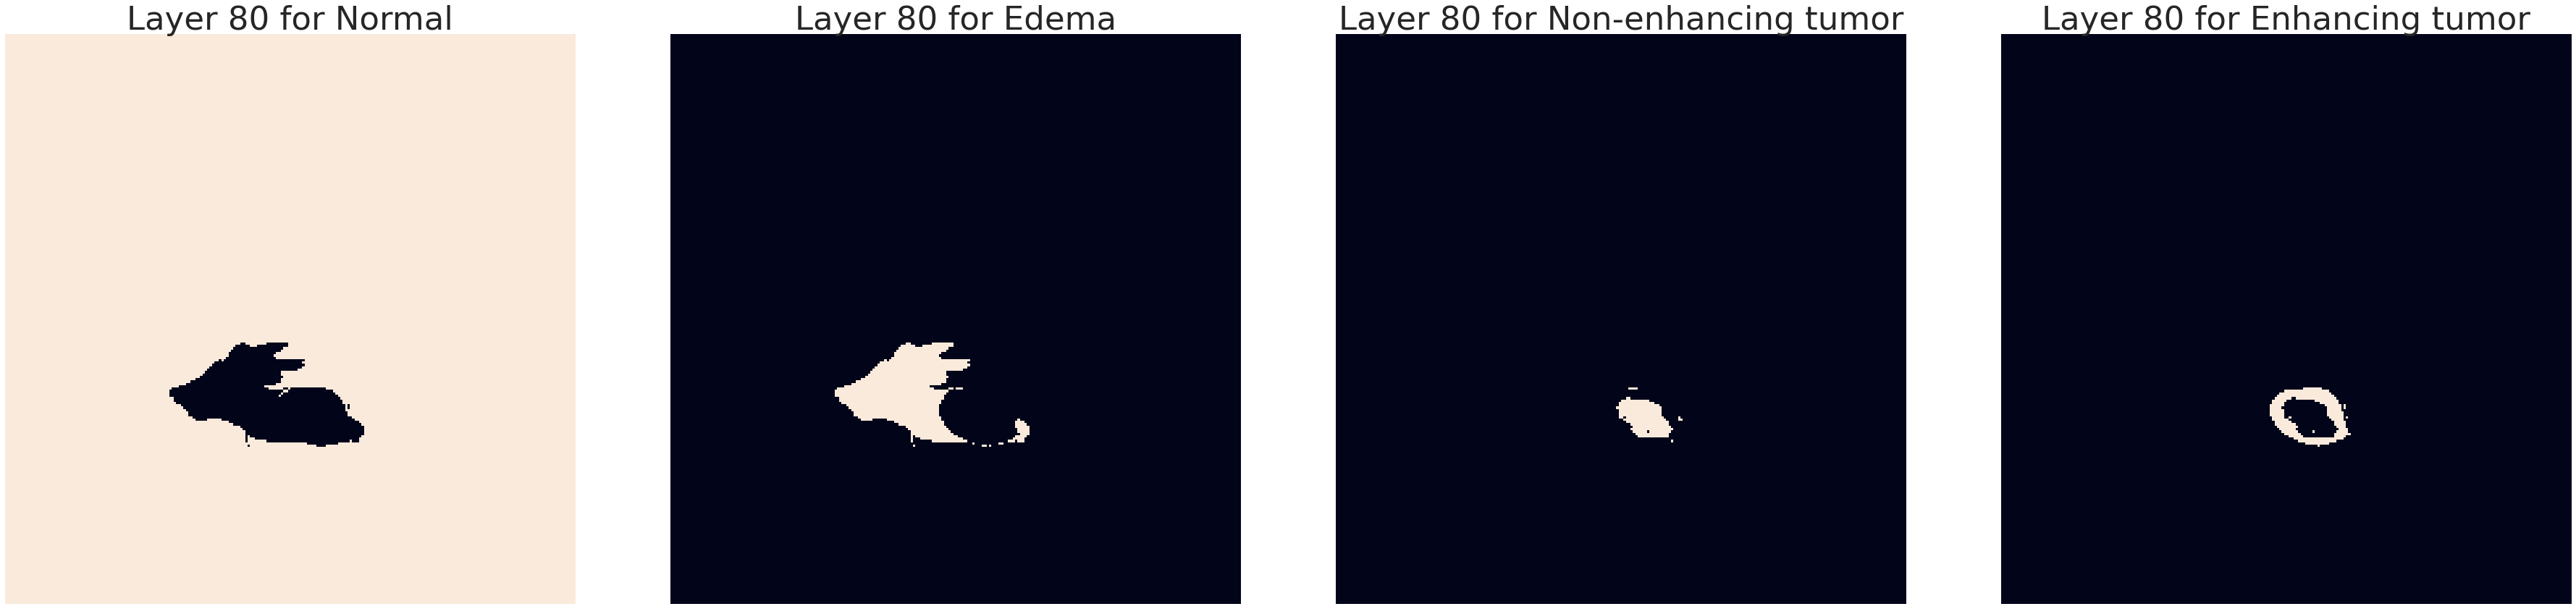

In [27]:
# Define single layer to visualize
layer = 80

# Define dictionary of class labels
classes_dict= {
    'Normal' : 0.,
    'Edema' : 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor':3
    }

# Configure plotting

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
  img_label_str = list(classes_dict.keys())[i]
  img = label_array[:, :, layer]
  mask = np.where(img == classes_dict[img_label_str], 255, 0)
  ax[i].imshow(mask)
  ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
  ax[i].axis('off')

plt.tight_layout()


## Interactive Visualization Across Layers

We can create an interactive visualization that will look at the data across all the layers. We can select a particular label and scroll across layers using the slider. 

In [32]:
# Create button attributes

select_class = ToggleButtons(
    options = ['Normal', 'Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled = False, 
    button_style='info'
)

# Create layer slider

select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)

# Create a function to plot images

def plot_image(seg_class, layer):
  print(f"Plotting {layer} Layer Label: {seg_class}")
  img_label = classes_dict[seg_class]
  mask = np.where(label_array[:, :, layer] == img_label, 255, 0)
  plt.figure(figsize=(16, 8))
  plt.imshow(mask, cmap='gray')
  plt.axis('off')

# Use interactive() to create visualization

interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Normal', 'Edem…